In [ ]:
# Image Type Conversion
    # Color Image to Grayscale
    # to Binary
# Geometric Transformation
    # Cropping
    # Scaling
    # Rotation
# Image Arithmetic / Brightness, Contrast Adjustments
    # Addition
    # Subtraction
    # Multiplication
    # Division
    # Brightness and/& Contrast Adjustment
    # Filteration -> Blurring and sharpening
# Morphology
    # Structuring Element
    # Dilation
    # Erosion
    # Closing
    # Opening
    # Removing Small Holes
    # Removing Small Objects
    # Region Properties
# Feature Detection
    # Feature Detection - Extraction
    # Feature Matching

In [29]:
import matplotlib.pyplot as plt
import cv2
import skimage

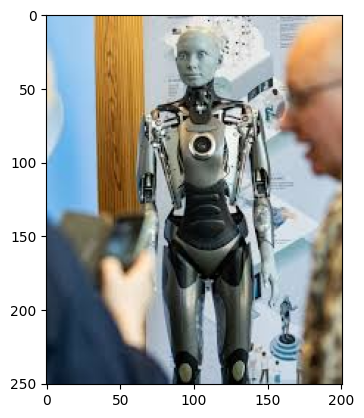

In [14]:
img = plt.imread('robot4.jpeg')
plt.imshow(img)

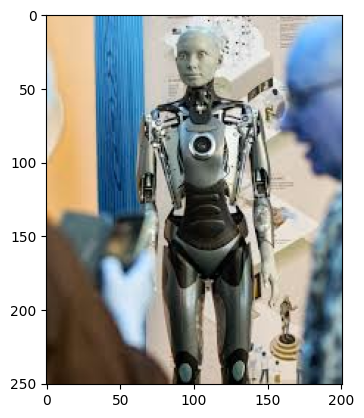

In [15]:
plt.imshow(img[:,:,::-1])


In [19]:
# Converting to GRAY
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray.shape

(251, 201)

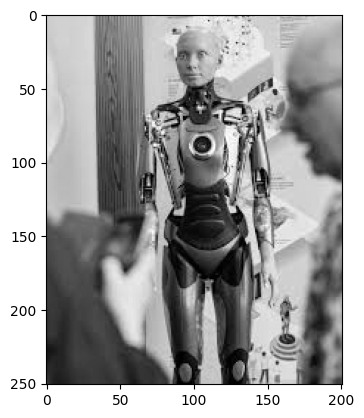

In [20]:
plt.imshow(img_gray, cmap='gray')

In [27]:
# converting to binary
th, img_bin = cv2.threshold(img_gray, 120,255, cv2.THRESH_BINARY)              # 70 above turns to white below 70 turns black   
img_bin.shape

(251, 201)

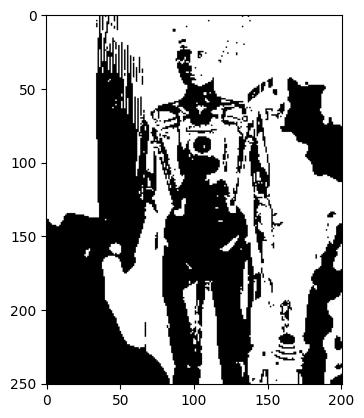

In [28]:
plt.imshow(img_bin, cmap='gray')

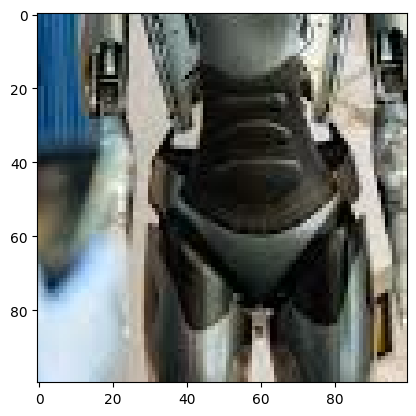

In [44]:
plt.imshow(img[100:200, 50:150, ::-1], cmap='gray')

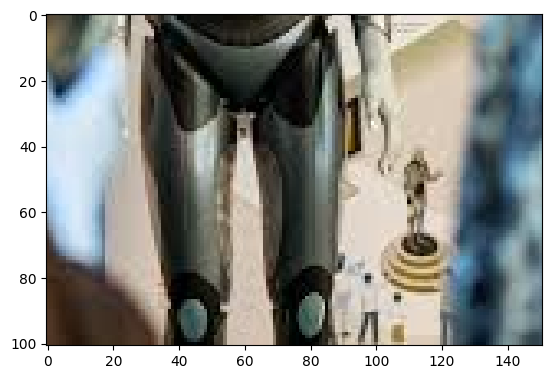

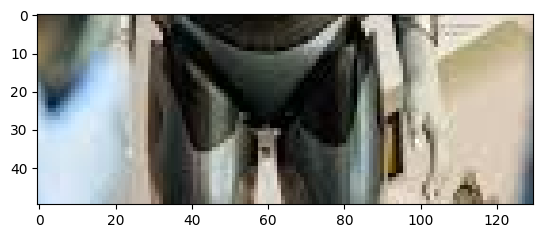

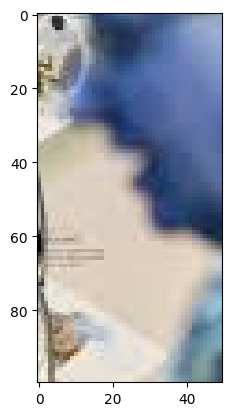

In [58]:
#CROPPING
x,y,w,h = (50,150,180,140)
plt.imshow(img[y:y+h, x:x+w, ::-1])
plt.show()

x1,y1,x2,y2 = (50,150,180,200)
plt.imshow(img[y1:y2, x1:x2,::-1])
plt.show()

y1,x1, y2,x2 = (50,150,150,200)
plt.imshow(img[y1:y2, x1:x2, ::-1])
plt.show()

In [59]:
img.shape

(251, 201, 3)

In [79]:
img_large = cv2.resize(img, (1000,1000), interpolation=cv2.INTER_CUBIC)           # interpolation is constant using which it perform approaches
img_large.shape

(1000, 1000, 3)

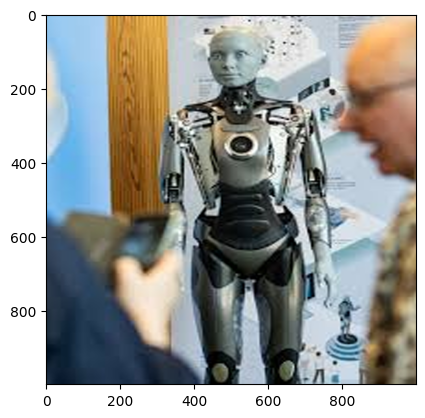

In [69]:
plt.imshow(img_large)

In [77]:
img_small = cv2.resize(img_large,(0,0), fx = 0.25, fy=0.25, interpolation=cv2.INTER_CUBIC)
img_small.shape

(250, 250, 3)

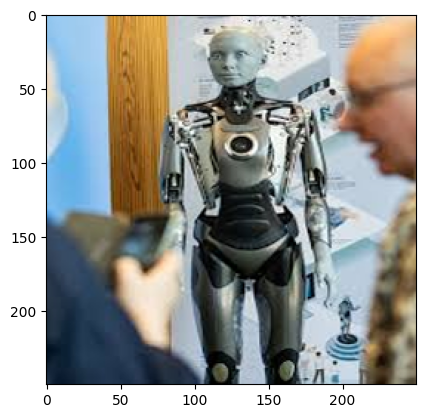

In [78]:
plt.imshow(img_small)

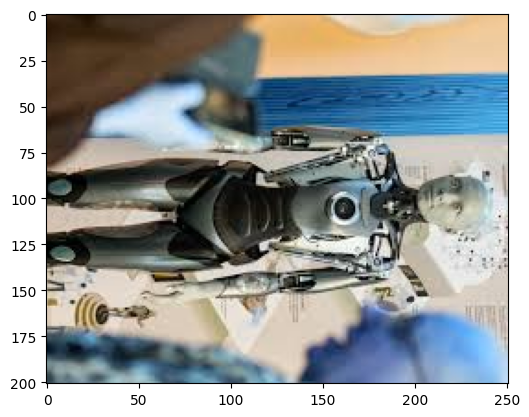

In [82]:
# Image Rotation
img_90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(img_90[:,:,::-1])

[[ 0.8660254 -0.5        0.       ]
 [ 0.5        0.8660254  0.       ]]


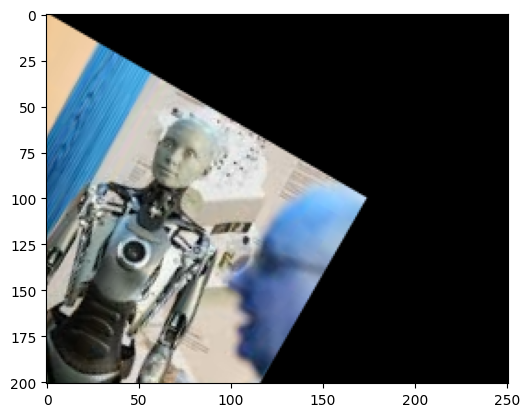

In [87]:
# method 1 for rotation
rot_mat = cv2.getRotationMatrix2D(center=(0,0), angle = -30, scale=1.0)
print(rot_mat)
img_x = cv2.warpAffine(img, rot_mat, dsize=img.shape[:2], flags = cv2.INTER_LINEAR)
plt.imshow(img_x[:,:,::-1])

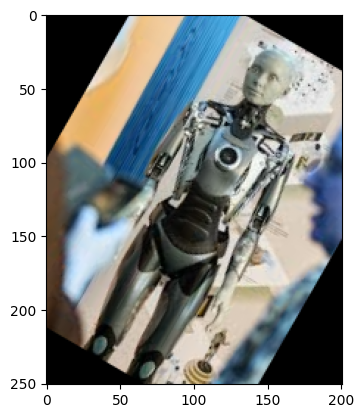

In [89]:
# method 2 for rotation
import skimage as ski
img_x = ski.transform.rotate(img, -30)
plt.imshow(img_x[:,:,::-1])

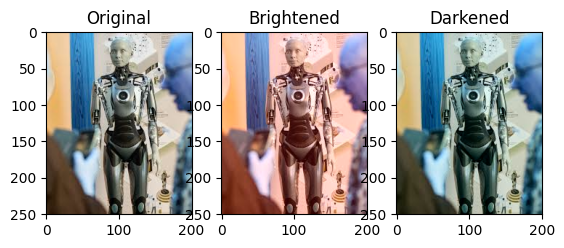

In [94]:
# Arithmetic Operation
plt.subplot(1,3,1)
plt.title('Original')
plt.imshow(img[:,:,::-1])

plt.subplot(1,3,2)
plt.title('Brightened')
plt.imshow(cv2.add(img[:,:,::-1], 50))

plt.subplot(1,3,3)
plt.title('Darkened')
plt.imshow(cv2.subtract(img[:,:,::-1],20))

(-0.5, 200.5, 250.5, -0.5)

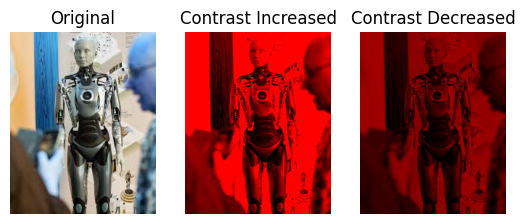

In [96]:
# Arithmetic Operation
# CONTRAST
plt.subplot(1,3,1)
plt.title('Original')
plt.imshow(img[:,:,::-1])
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Contrast Increased')
plt.imshow(cv2.multiply(img[:,:,::-1], 1.5))
plt.axis('off')

plt.subplot(1,3,3)
plt.title('Contrast Decreased')
plt.imshow(cv2.divide(img[:,:,::-1],1.5))
plt.axis('off')

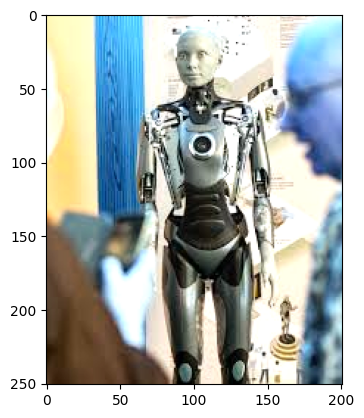

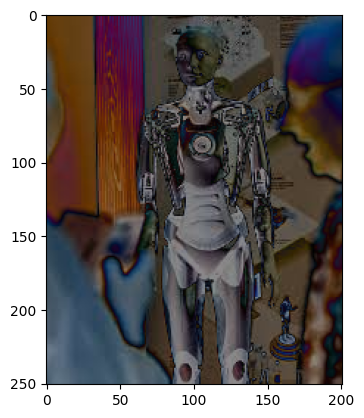

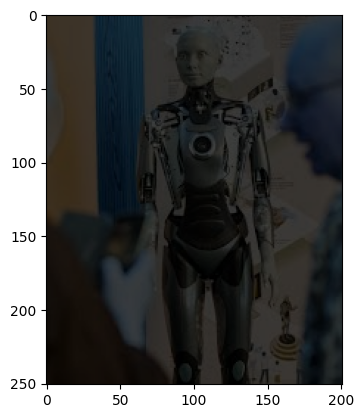

In [104]:
img_cntbrt = cv2.convertScaleAbs(
    img, alpha = 1.25, beta = 0
)                                              # Alpha is for contrast Beta is for Brightness
plt.imshow(img_cntbrt[:,:,::-1])
plt.show()

img_cntbrt = cv2.convertScaleAbs(
    img, alpha = 1, beta = -140
)
plt.imshow(img_cntbrt[:,:,::-1])
plt.show()

img_cntbrt = cv2.convertScaleAbs(
    img, alpha = 0.25, beta = 0
)
plt.imshow(img_cntbrt[:,:,::-1])
plt.show()



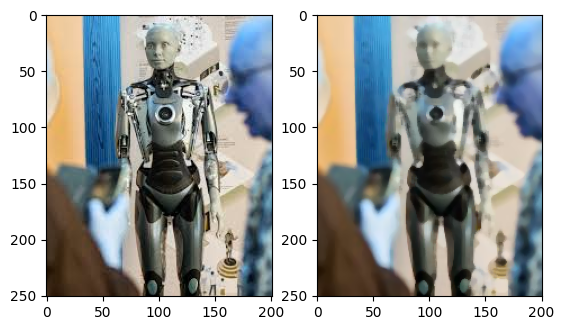

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


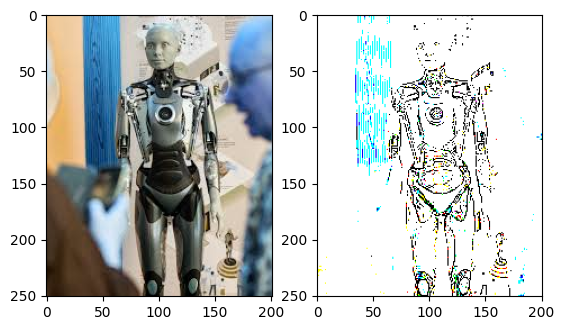

In [118]:
# Filteration

plt.subplot(1,2,1)
plt.imshow(img[:,:,::-1])

img_blur = cv2.medianBlur(img, 5)
plt.subplot(1,2,2)
plt.imshow(img_blur[:,:,::-1])


plt.show()
plt.subplot(1,2,1)
plt.imshow(img[:,:,::-1])
plt.subplot(1,2,2)
shrp_kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
img_sharp = cv2.filter2D(img, ddepth = 5, kernel = shrp_kernel)
plt.imshow(img_sharp[:,:,::-1])